In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np

# Files to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city = pd.read_csv(city_data_to_load)
ride = pd.read_csv(ride_data_to_load)

# Let's print column names to see what we should combine on
print(f"{city.columns} \r\n{ride.columns}")

Index(['city', 'driver_count', 'type'], dtype='object') 
Index(['city', 'date', 'fare', 'ride_id'], dtype='object')


In [2]:
# Combine the data into a single dataset
# Looks like we can combine on "city" as it's the only column name in common between the two datasets.
cityride = pd.merge(ride, city,  on = "city", how = "inner")
# Chose "inner" because if I don't have data for a city in one of the datasheets, then that city is relatively
# useless to me. 

# Display the data table for preview
cityride.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

In [3]:
# Look at the different city types
cityride.type.value_counts()

Urban       1625
Suburban     625
Rural        125
Name: type, dtype: int64

Text(0, 0.5, 'Average Fare ($)')

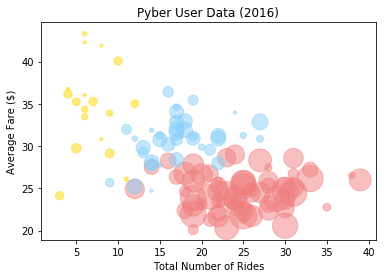

In [4]:
# Obtain the x and y coordinates for each of the three city types
# This is one, super long and annoying way to do it. I don't like it, but it works. 
# See next cell for, perhaps, a more elegant way of doing this.
citytype = cityride.groupby("city")
city_fare = citytype.mean()
city_count = citytype.count()
city_type = citytype.max()

bycity_a = pd.merge(city_fare, city_count, on = "city", how = "outer", suffixes = ("_mean", "_count"))
bycity = pd.merge(bycity_a, city_type, on = "city", how = "outer", suffixes =("", "_type"))
bycity = bycity.drop(labels = ["ride_id_mean", "driver_count_mean", "date", "fare_count", "driver_count_count",
                               "type", "date_type", "fare", "ride_id"], axis = 1)
bycity = bycity.rename(columns = {"ride_id_count":"total_rides","type_type" : "type"})

plt.scatter(x = bycity.total_rides.loc[bycity.type == "Urban"], 
            y =bycity.fare_mean.loc[bycity.type == "Urban"], color = "lightcoral", marker = 'o', label = "Urban", 
           s = 10*bycity.driver_count.loc[bycity.type=="Urban"], alpha = .5)

plt.scatter(x = bycity.total_rides.loc[bycity.type == "Suburban"], 
            y =bycity.fare_mean.loc[bycity.type == "Suburban"], color = "lightskyblue", marker = 'o', label = "Suburban",
            s = 10*bycity.driver_count.loc[bycity.type=="Suburban"], alpha = .5)

plt.scatter(x = bycity.total_rides.loc[bycity.type == "Rural"], 
            y =bycity.fare_mean.loc[bycity.type == "Rural"], color = "gold", marker = 'o', label = "Rural", 
            s = 10*bycity.driver_count.loc[bycity.type=="Rural"], alpha = .5)
plt.title("Pyber User Data (2016)")
plt.xlabel("Total Number of Rides")
plt.ylabel("Average Fare ($)")
# Because of my general frustration with this method, I invested little time in making it pretty. 


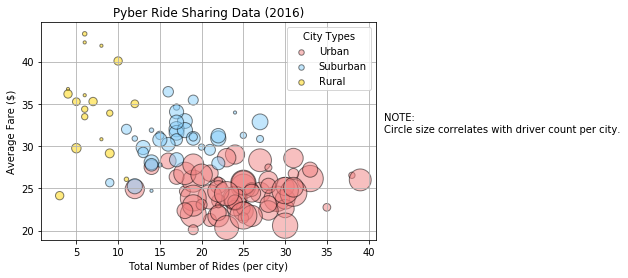

<Figure size 432x288 with 0 Axes>

In [5]:
# An alternative way to do the graph. Maybe it's more DFs but it seems less clunky 
# Data frame for each type of area
urb = cityride.loc[cityride.type == "Urban"]
sub = cityride.loc[cityride.type == "Suburban"]
rur = cityride.loc[cityride.type == "Rural"]

# Group by city so we can get metrics on each city
urb_city = urb.groupby("city")
sub_city = sub.groupby("city")
rur_city = rur.groupby("city")

# Get the mean for fares AND driver count (mean of driver count = driver count)
urban = urb_city.mean()
suburb = sub_city.mean()
rural = rur_city.mean()

# Get the total number of rides
urb_r = urb_city.count()
sub_r = sub_city.count()
rur_r = rur_city.count()

# replace ride_id so we have a count rather than a mean
urban.ride_id = urb_r.ride_id
suburb.ride_id = sub_r.ride_id
rural.ride_id = rur_r.ride_id

# Now plot the sh*t out of it
plt.scatter(x = urban.ride_id, y =urban.fare, color = "lightcoral", edgecolor = "black",
            marker = 'o', label = "Urban", s = 10*urban.driver_count, alpha = .5)
plt.scatter(x = suburb.ride_id, y =suburb.fare, color = "lightskyblue", edgecolor = "black",
            marker = 'o', label = "Suburban", s = 10*suburb.driver_count, alpha = .5)
plt.scatter(x = rural.ride_id, y =rural.fare, color = "gold", edgecolor = "black",
            marker = 'o', label = "Rural", s = 10*rural.driver_count, alpha = .5)

# Label things and make a grid
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (per city)")
plt.ylabel("Average Fare ($)")
plt.grid(which='major', axis='both')

# Work on the legend and side note.
lgnd = plt.legend(title = "City Types", scatterpoints = 1, fontsize=10)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
plt.figtext(x = .92, y = .5, s = "NOTE: \nCircle size correlates with driver count per city.")
plt.show() # Apprently doing this will then get rid of the other outputs that come from the above code. COOL!

# Save figure
plt.savefig("Pyber_Bubbles.jpg")

## Total Fares by City Type

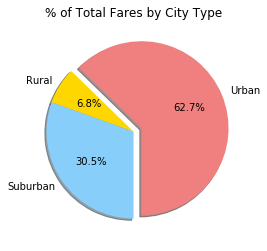

In [6]:
# Calculate fares by raw numbers (then use pie autopct to calculate percents)
urb_fare = urb.fare.sum()
sub_fare = sub.fare.sum()
rur_fare = rur.fare.sum()

total_fare = cityride.fare.sum()

# Establish colors. Only need to do this once.
# colors = ("tomato","yellow","cyan")  BAH! apparently "you MUST stick to the Pyber color scheme"
colors = ("lightcoral","gold","lightskyblue")

# Build Pie Chart
plt.pie([urb_fare, rur_fare, sub_fare], explode = (.1,0,0), labels = ["Urban", "Rural", "Suburban"], 
        autopct = '%.1f%%', startangle = -90, colors = colors, shadow = True)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("Fare_CityType.jpg")

## Total Rides by City Type

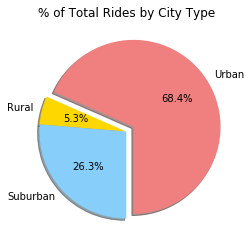

In [7]:
# Calculate total number of rides by city type
urb_ride = urb.ride_id.count()
sub_ride = sub.ride_id.count()
rur_ride = rur.ride_id.count()

total_ride = cityride.ride_id.count()

# Build Pie Chart
plt.pie([urb_ride, rur_ride, sub_ride], explode = (.1,0,0), labels = ["Urban", "Rural", "Suburban"], 
        autopct = '%.1f%%', startangle = -90, colors = colors, shadow = True)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("Rides_CityType.jpg")

## Total Drivers by City Type

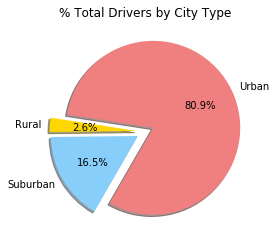

In [8]:
# Calculate Driver counts for each city.
urb_dc = urb_city.driver_count.max()
sub_dc = sub_city.driver_count.max()
rur_dc = rur_city.driver_count.max()

# Sum the number of drivers within each city type
urb_drive = sum(urb_dc)
sub_drive = sum(sub_dc)
rur_drive = sum(rur_dc)

# Build Pie Charts
plt.pie([urb_drive, rur_drive, sub_drive], shadow = True, autopct='%.1f%%', startangle = -120,
       explode = (.1, .1, .1), labels = ["Urban", "Rural", "Suburban"], colors = colors)
plt.title("% Total Drivers by City Type")

# Save Figure
plt.savefig("Driver_CityType.jpg")